In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
from google.colab import files

# Cargar datos

if not os.path.exists("csgo_datos_limpios.csv"):
  uploaded = files.upload()

df = pd.read_csv("csgo_datos_limpios.csv", sep=",")


# Filtrar partidas sin errores (por ejemplo, "AbnormalMatch" == False)
df_clean = df[df["AbnormalMatch"] == False].copy()

# Mostrar las primeras filas para ver la estructura
df_clean.head()

<ipython-input-17-1fd8c05d54bb>:18: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_datos_limpios.csv", sep=",")


,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


# Seleccion de variables

In [6]:
# Definición de variables predictoras y target
features = [
    "RoundKills",
    "RoundAssists",
    "RoundHeadshots",
    "TeamStartingEquipmentValue",
    "RLethalGrenadesThrown",
    "RNonLethalGrenadesThrown"
]
target = "MatchKills"  # Número total de kills en la partida

# Extraer X (predictoras) e y (target) y rellenar nulos con la media
X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean[target].fillna(df_clean[target].mean())

print("Dimensiones de las variables predictoras:", X.shape)
print("Dimensiones del target:", y.shape)


Dimensiones de las variables predictoras: (79157, 6)
Dimensiones del target: (79157,)


# Entrenamiento

In [12]:
# 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


Tamaño de X_train: (63325, 6)
Tamaño de X_test: (15832, 6)


LinearRegression()

In [15]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo de Regresión Lineal Múltiple: Variables predictoras -> MatchKills")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Modelo de Regresión Lineal Múltiple: Variables predictoras -> MatchKills
Error cuadrático medio (MSE): 36.35
Error absoluto medio (MAE): 4.99
Coeficiente de determinación (R²): 0.06


# Visualizacion

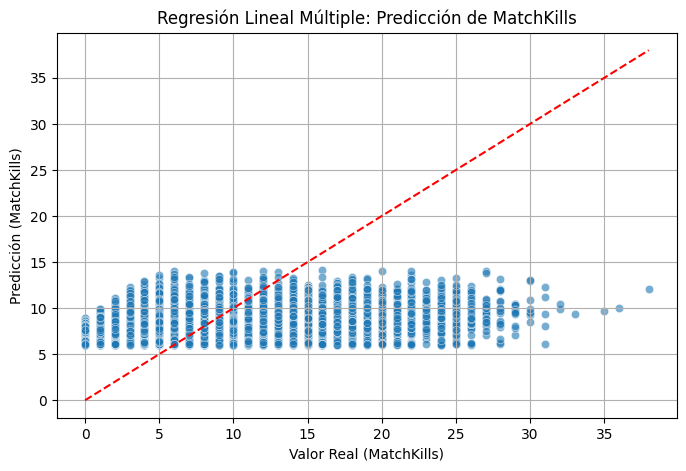

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal 45º
plt.xlabel("Valor Real (MatchKills)")
plt.ylabel("Predicción (MatchKills)")
plt.title("Regresión Lineal Múltiple: Predicción de MatchKills")
plt.grid(True)
plt.show()


# Visualizar la importancia (coeficientes) de cada variable

In [19]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)
print(coef_df)


                      Feature  Coeficiente
0                  RoundKills     1.094665
4       RLethalGrenadesThrown     0.126016
5    RNonLethalGrenadesThrown     0.081984
3  TeamStartingEquipmentValue     0.000089
1                RoundAssists    -0.044285
2              RoundHeadshots    -0.077012


MSE (36.35): Indica que la suma de los errores al cuadrado es moderadamente alta, lo que se traduce en una variación considerable en las predicciones respecto a los valores reales.

MAE (4.99): Significa que, en promedio, el modelo se equivoca por aproximadamente 5 kills al predecir MatchKills, lo cual puede ser relevante dependiendo del rango típico de kills.

R² (0.06): Solo el 6% de la variabilidad en MatchKills se explica a partir de las variables utilizadas. Esto sugiere que el modelo tiene una capacidad explicativa muy limitada.

Coeficientes:

RoundKills (1.0947): Tiene el mayor impacto positivo, lo que indica que un aumento en las kills por ronda se asocia fuertemente con un mayor MatchKills.

RLethalGrenadesThrown (0.1260) y RNonLethalGrenadesThrown (0.0820): Contribuyen ligeramente de forma positiva.

TeamStartingEquipmentValue (0.00009): Prácticamente no tiene efecto, lo que sugiere que el equipamiento inicial del equipo no incide en los kills predichos.

RoundAssists (-0.0443) y RoundHeadshots (-0.0770): Muestran una relación negativa leve, lo cual podría interpretarse como que, en el